In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Template 01

## Moons and Decision boundary

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Import Statements

In [3]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric


#Datasets
from sklearn.datasets import make_moons

In [4]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'

#CONSTS

NOISE = 0.2
EPOCHS = 10001
ALPHA = 0.1
N_SAMPLES = 1000
RANDOM_STATE = 24 
TEST_SIZE  = 0.2 # Size of test data
CMAP = plt.cm.coolwarm


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }


#np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')
plt.style.use("dark_background")

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fn_plot_decision_boundary(X: np.ndarray, y :np.ndarray, model, pred_func):
    """
    Plots the decision boundary for a classification model.

    Args:
        X: The input features (numpy array, expected shape (m, 2)).
        y: The true labels (numpy array).
        model: A dictionary containing the trained weights and biases (W1, W2, B1, B2).
        pred_func: A function that takes the model and a feature array (XX) 
                   and returns the class predictions (0 or 1).
    """
    # NOTE: The weights retrieval 'model.we' was incorrect and is removed.
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 0.5 # Increased padding for better visualization
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # NOTE: The line 'XX = np.hstack((XX, np.ones((XX.shape[0], 1))))' is removed.
    # The bias term is handled internally by the neural network's forward propagation 
    # (z1 = X.dot(w1) + b1), so the input data (XX) shouldn't be augmented with a column of ones.

    # Make predictions for the entire mesh grid
    # The pred_func should handle the forward pass through the model and return binary predictions.
    y_p = pred_func(model, XX) 
    
    # Reshape predictions to match the original mesh grid dimensions (xx.shape)
    # y_p is expected to be a 1D array of predictions (0 or 1).
    Z = np.array(y_p).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    # Use 'coolwarm' or 'bwr' for binary classification. 'Purples' is usually for single-class density.
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm) 
    
    # Scatter plot of the actual data points, colored by their true class labels
    # Use 'y' for the color (true label) instead of X[:, 2] (which might not exist or be the label).
    ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, edgecolor='k', cmap=plt.cm.coolwarm) 
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('Feature 1')  
    ax.set_ylabel('Feature 2') 
    
    # Display the final plot
    plt.show()

# NOTE: You will need to define the 'pred_func' (e.g., predict) and import
# 'numpy' as 'np' and 'matplotlib.pyplot' as 'plt' for this function to run.

In [6]:
X, y = make_moons(n_samples=N_SAMPLES, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)
(type(X), type(y))

(numpy.ndarray, numpy.ndarray)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [9]:
def fn_sigmoid(z):
    return 1 / (1+np.exp(-z))

In [10]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(Z):
    return 1.0 - np.tanh(Z)**2

In [11]:
fn_actv(np.asarray([-1.0, 0.0, 1.0, -np.inf, np.inf]))

array([-0.76159416,  0.        ,  0.76159416, -1.        ,  1.        ])

In [12]:
def predict(model, X):
    w1 , w2, b1, b2  = model["W1"],  model["W2"], model["B1"], model["B2"]
    z1 = X.dot(w1) + b1  # aggregation
    a1 = fn_actv(z1)  # activation

    z2 = a1.dot(w2) + b2 
    a2 = fn_sigmoid(z2)
    
    return a2 >= 0.5

In [13]:
def calculate_loss(model, X, y):
    w1 , w2, w3,w4,w5=  model["W1"],  model["W2"],model["W3"],  model["W4"],model["W5"]
    b1, b2,b3,b4,b5  = model["B1"], model["B2"], model["B3"], model["B4"], model["B5"]
    m = X.shape[0]
    z1 = X.dot(w1) + b1  # aggregation
    a1 = fn_actv(z1)  # activation

    ## Forward prop

    # layer hidden
    z1 = X.dot(w1) + b1  # aggregation
    a1 = fn_actv(z1)  # activation

    # layer op
    z2 = a1.dot(w2) + b2  # aggregation
    a2 = fn_actv(z2)  # activation

    # layer op
    z3 = a2.dot(w3) + b3  # aggregation
    a3 = fn_actv(z2)  # activation

    # layer op
    z4 = a3.dot(w4) + b4  # aggregation
    a4 = fn_actv(z4)  # a

    # layer op
    z5 = a4.dot(w5) + b5  # aggregation
    a5 = fn_actv(z5)  # a
    
    data_loss = -(y * np.log(a2) + (1-y) * np.log(1-a2)).sum()
    return data_loss / m
    

In [21]:
def build_model(nn_hdim, X, y, alpha, n_epochs):
    m, nn_inupt_dim = X.shape
    nn_output_dim = y.shape[1]
    w1 = rng.random((nn_inupt_dim, nn_hdim)) / np.sqrt(nn_inupt_dim)
    w2 = rng.random((nn_hdim, nn_output_dim)) / np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))

    loss, epoch = [], []
    model = {"W1": w1,
                "W2": w2,
                "B1": b1,
                "B2": b2}
    for i in range(n_epochs):
        ## Forward prop

        # layer hidden
        z1 = X.dot(w1) + b1  # aggregation
        a1 = fn_actv(z1)  # activation

        # layer op
        z2 = a1.dot(w2) + b2  # aggregation
        a2 = fn_actv(z2)  # activation

        # layer op
        z3 = a2.dot(w3) + b3  # aggregation
        a3 = fn_actv(z2)  # activation

        # layer op
        z4 = a3.dot(w4) + b4  # aggregation
        a4 = fn_actv(z4)  # a

        # layer op
        z5 = a4.dot(w5) + b5  # aggregation
        a5 = fn_actv(z5)  # a

        ## Back_propogation

        # layer 5
        dz5 = a4 - y
        assert(z5.shape == dz5.shape), f'Shape z2 is FOOCKEDDD : {z5.shape} , {dz5.shape}'

        dw5 = (a4.T).dot(dz5)
        assert(w5.shape == dw5.shape), f'Shape w2 is FOOCKEDDD : {w5.shape} , {dw5.shape}'

        db5 = np.sum(dz5, axis=0, keepdims=True)
        assert(b5.shape == db5.shape), f'Shape b2 is FOOCKEDDD : {b5.shape} , {db5.shape}'

        da5 = dz5.dot(w5.T)
        assert(a5.shape == da5.shape), f'Shape aa is FOOCKEDDD : {a4.shape} , {da4.shape}'

        # layer 4
        dz4 = a3 - y
        assert(z4.shape == dz4.shape), f'Shape z2 is FOOCKEDDD : {z4.shape} , {dz4.shape}'

        dw4 = (a3.T).dot(dz5)
        assert(w4.shape == dw4.shape), f'Shape w2 is FOOCKEDDD : {w4.shape} , {dw4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'Shape b2 is FOOCKEDDD : {b4.shape} , {db4.shape}'

        da4 = dz5.dot(w4.T)
        assert(a4.shape == da4.shape), f'Shape aa is FOOCKEDDD : {a3.shape} , {da3.shape}'


        # layer 3
        dz3 = a2 - y
        assert(z3.shape == dz3.shape), f'Shape z2 is FOOCKEDDD : {z4.shape} , {dz4.shape}'

        dw4 = (a3.T).dot(dz5)
        assert(w4.shape == dw4.shape), f'Shape w2 is FOOCKEDDD : {w4.shape} , {dw4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert(b4.shape == db4.shape), f'Shape b2 is FOOCKEDDD : {b4.shape} , {db4.shape}'

        da4 = dz5.dot(w4.T)
        assert(a4.shape == da4.shape), f'Shape aa is FOOCKEDDD : {a3.shape} , {da3.shape}'

        # layer 2
        dz2 = a2 - y
        assert(z2.shape == dz2.shape), f'Shape z2 is FOOCKEDDD : {z2.shape} , {dz2.shape}'

        dw2 = (a1.T).dot(dz2)
        assert(w2.shape == dw2.shape), f'Shape w2 is FOOCKEDDD : {w2.shape} , {dw2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert(b2.shape == db2.shape), f'Shape b2 is FOOCKEDDD : {b2.shape} , {db2.shape}'

        da1 = dz2.dot(w2.T)
        assert(a1.shape == da1.shape), f'Shape aa is FOOCKEDDD : {a1.shape} , {da1.shape}

        # layer1
        dz1 = da1 * fn_actv_prime(z1)
        assert(z1.shape == dz1.shape), f'Shape z1 is FOOCKEDDD : {z1.shape} , {dz1.shape}'
        dw1 = (X.T).dot(dz1)
        assert(dw1.shape == w1.shape), f'Shape dw1 is FOOCKEDDD : {dw1.shape} , {dw1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert(db1.shape == b1.shape), f'Shape db1 is FOOCKEDDD : {db1.shape} , {b1.shape}'

        # Parameter updates
        w1 -= (alpha * dw1 / m)
        b1 -= (alpha * db1 / m)
        w2 -= (alpha * dw2 / m)
        b2 -= (alpha * db2 / m)
        w3 -= (alpha * dw3 / m)
        b3 -= (alpha * db3 / m)
        w4 -= (alpha * dw4 / m)
        b4 -= (alpha * db4 / m)
        w5 -= (alpha * dw5 / m)
        b5 -= (alpha * db5 / m)

        model = {"W1": w1,
                 "W2": w2,
                 "W3": w2,
                 "W2": w2,
                 "W2": w2,
                 "W2": w2,
                 "B1": b1,
                 "B2": b2,
                 "B1": b1,
                 "B2": b2,
                 "B1": b1,
                 "B2": b2,}

        cur_loss = calculate_loss(model, X_tr, y_tr)
        cur_tr_loss = calculate_loss(model, X_ts, y_ts)
        epoch.append(i)
        loss.append(cur_loss)
        tloss.append(cur_ts_loss)
        print(f"loss : {loss} for epoch : {epoch}")

    loss_hist['epoch'] = epoch
    loss_hist["loss"] = loss
    loss_hist["tst_loss"] = tst_loss
    return model

SyntaxError: unterminated string literal (detected at line 47) (2229913358.py, line 47)

In [15]:
y_train = y_train.reshape(-1,1)
loss_hist = {}
y_train.shape

(800, 1)

In [16]:
model = build_model(nn_hdim=4, X = X_train, y = y_train, alpha= ALPHA, n_epochs= EPOCHS)
model["W1"].shape, model["W2"].shape, model["B1"].shape, model["B2"].shape

loss : [np.float64(0.7188583199311445)] for epoch : [0]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122)] for epoch : [0, 1000]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122), np.float64(0.25014022083707965)] for epoch : [0, 1000, 2000]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122), np.float64(0.25014022083707965), np.float64(0.1713273244223582)] for epoch : [0, 1000, 2000, 3000]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122), np.float64(0.25014022083707965), np.float64(0.1713273244223582), np.float64(0.1306774732916653)] for epoch : [0, 1000, 2000, 3000, 4000]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122), np.float64(0.25014022083707965), np.float64(0.1713273244223582), np.float64(0.1306774732916653), np.float64(0.09462513119348007)] for epoch : [0, 1000, 2000, 3000, 4000, 5000]
loss : [np.float64(0.7188583199311445), np.float64(0.2929160776002122), np.float64(0.2501

((2, 4), (4, 1), (1, 4), (1, 1))

In [17]:
model 

{'W1': array([[ 0.86115925,  2.3845816 ,  3.7091301 ,  2.94078212],
        [-0.46062864, -1.10972655,  2.95957829, -1.39213507]]),
 'W2': array([[ 3.48944941],
        [ 4.64437871],
        [-6.52226563],
        [ 5.59126842]]),
 'B1': array([[-1.01624971, -3.04192614, -2.37876587,  1.76285957]]),
 'B2': array([[0.70289683]])}

In [18]:
loss_df = pd.DataFrame(loss_hist)
loss_df

,epoch,loss
0,0,0.718858
1,1000,0.292916
2,2000,0.250140
3,3000,0.171327
4,4000,0.130677
5,5000,0.094625
6,6000,0.078668
7,7000,0.071178
8,8000,0.067025
9,9000,0.064426


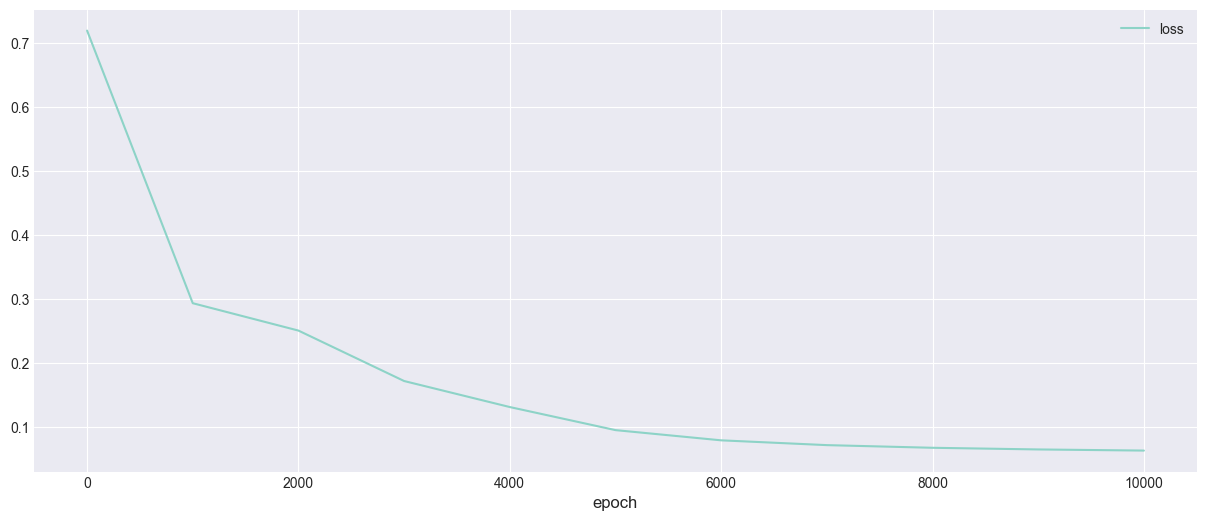

In [19]:
loss_df.plot(x = 'epoch', y = 'loss')
plt.show()

In [20]:
fn_plot_decision_bFoundary(X, y, model, predict)

NameError: name 'fn_plot_decision_bFoundary' is not defined

In [ ]:
y_pred = predict(model,X_test)
print(f"Accuracy:{accuracy_score(y_test.argmax(axis=1),y_pred)}")
print(Classification_report(y_test.argmax(axis =1),y_pred))
cm = confusion_matrix(y_train.argmax(axis =1),y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ['A','B'])
fig,ax = plt.subplots(figsize = (4,4))
disp.plot(ax = ax, cmap = 'Blues',colorbar = False)
ax.grid(False)
ax.set_title(f'F1-Score:{f1_score(y_train.argmax(axis = 1),y_pred,average = 'weighted')}')